In [33]:
def answer_one():
        import pandas as pd
        import numpy as np
        energy = pd.read_csv('Energy Indicators.csv',skiprows=16,skipfooter=38,engine='python')
        energy.drop(energy.columns[[0,1]], axis=1,inplace=True)
        energy=energy.dropna(axis=1,how='all')

        for col in energy.columns:
            if col[:]=='Energy Supply per capita':
                energy.rename(columns={col:'Energy Supply per Capita'},inplace=True)
            if col[:]=='Renewable Electricity Production':
                energy.rename(columns={col:'% Renewable'},inplace=True)
            energy.rename(columns={ energy.columns[0]: "Country" },inplace=True)

        energy.dropna(subset=['Country'], how = 'all',inplace=True)

        #replace empty values with Nan
        energy[['Energy Supply','Energy Supply per Capita','% Renewable']] = energy[['Energy Supply','Energy Supply per Capita','% Renewable']].apply(pd.to_numeric,errors='coerce')      
        energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x:x*1000000)

        energy['Country'].replace(
            to_replace=['United States of America20','United States Virgin Islands','Bolivia (Plurinational State of)',
                   'China2','China, Hong Kong Special Administrative Region3','China, Macao Special Administrative Region4',
                   'Denmark5','France6','Greenland7','Indonesia8','Iran (Islamic Republic of)','Italy9',
                   'Japan10','Kuwait11','Micronesia (Federated States of)','Netherlands12','Portugal13','Saudi Arabia14',
                   'Serbia15','Ukraine18','Venezuela (Bolivarian Republic of)','United Kingdom of Great Britain and Northern Ireland19'],
            value=['United States','United Virgin','Bolivia','China','Hong Kong','China, Macao Special Administrative Region',
              'Denmark','France','Greenland','Indonesia','Iran','Italy','Japan','Kuwait','Micronesia','Netherlands',
              'Portugal','Saudi Arabia','Serbia','Ukraine','Venezuela','United Kingdom'],
            inplace=True)


        GDP = pd.read_csv('world_bank.csv',skiprows=4)
        GDP['Country Name'].replace(
            to_replace=['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],
            value=['South Korea','Iran','Hong Kong'],
            inplace=True
        )
        GDP.dropna(axis=1,how='all',inplace=True)

        ScimEn = pd.read_csv("scimagojr.csv")

        energy = energy.set_index('Country')
        GDP = GDP.set_index('Country Name')
        ScimEn = ScimEn.set_index('Country')

        intermediate_merge = pd.merge(energy,  GDP , how='outer', left_index=True, right_index=True)
        final_merge = pd.merge(intermediate_merge,  ScimEn, how = 'outer' , left_index=True, right_index=True).sort_values(['Rank'],ascending=True)

        for i in range(1960,2005):
            final_merge.drop(str(i),axis=1,inplace=True)

        final_merge.head(15)

        cols = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
        final_merge = final_merge[cols]
        result_df = final_merge.head(15)

        return result_df

In [2]:
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1.0,147887.0,147512.0,856806.0,583858.0,5.79,162.0,NaN,93.0,19.75,2.752132e+12,3.552183e+12,4.598205e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106466e+13
United States,2.0,113579.0,111426.0,1085684.0,370574.0,9.56,259.0,NaN,286.0,11.57,1.385589e+13,1.447764e+13,1.471858e+13,1.441874e+13,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.739310e+13,1.803665e+13
Japan,3.0,34294.0,34054.0,275980.0,73491.0,8.05,145.0,NaN,149.0,10.23,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.848733e+12,4.383076e+12
United Kingdom,4.0,24328.0,23671.0,278694.0,52119.0,11.46,159.0,NaN,124.0,10.60,2.678278e+12,3.063005e+12,2.875463e+12,2.367127e+12,2.429680e+12,2.608825e+12,2.646003e+12,2.719509e+12,2.998834e+12,2.861091e+12
India,5.0,21450.0,21183.0,179494.0,54929.0,8.37,132.0,NaN,26.0,14.97,9.203165e+11,1.201112e+12,1.186953e+12,1.323940e+12,1.656617e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.035393e+12,2.111751e+12
Russian Federation,6.0,21259.0,20915.0,45629.0,17368.0,2.15,65.0,NaN,214.0,17.29,9.899305e+11,1.299705e+12,1.660844e+12,1.222644e+12,1.524916e+12,2.031769e+12,2.170144e+12,2.230625e+12,2.063662e+12,1.365865e+12
Germany,7.0,20898.0,20640.0,193676.0,39615.0,9.27,140.0,NaN,165.0,17.90,3.002446e+12,3.439953e+12,3.752366e+12,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.879277e+12,3.363600e+12
Canada,8.0,20689.0,20353.0,285554.0,53955.0,13.80,165.0,NaN,296.0,61.95,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.824289e+12,1.842628e+12,1.792883e+12,1.552808e+12
France,9.0,15584.0,15387.0,173959.0,37411.0,11.16,129.0,NaN,166.0,17.02,2.325012e+12,2.663113e+12,2.923466e+12,2.693827e+12,2.646837e+12,2.862680e+12,2.681416e+12,2.808511e+12,2.849305e+12,2.433562e+12
South Korea,10.0,14037.0,13952.0,151281.0,29670.0,10.78,116.0,NaN,NaN,NaN,1.011797e+12,1.122679e+12,1.002219e+12,9.019350e+11,1.094499e+12,1.202464e+12,1.222807e+12,1.305605e+12,1.411334e+12,1.382764e+12


In [3]:
Top15 = answer_one()

In [7]:
Top15['Sum'] = Top15[['Citations','Self-citations']].sum(axis=1)

In [8]:
Top15['Ratio'] = Top15['Self-citations']/Top15['Citations']

In [10]:
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,Sum,Ratio
China,1.0,147887.0,147512.0,856806.0,583858.0,5.79,162.0,NaN,93.0,19.75,...,4.598205e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106466e+13,1440664.0,0.681435
United States,2.0,113579.0,111426.0,1085684.0,370574.0,9.56,259.0,NaN,286.0,11.57,...,1.471858e+13,1.441874e+13,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.739310e+13,1.803665e+13,1456258.0,0.341328
Japan,3.0,34294.0,34054.0,275980.0,73491.0,8.05,145.0,NaN,149.0,10.23,...,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.848733e+12,4.383076e+12,349471.0,0.266291
United Kingdom,4.0,24328.0,23671.0,278694.0,52119.0,11.46,159.0,NaN,124.0,10.60,...,2.875463e+12,2.367127e+12,2.429680e+12,2.608825e+12,2.646003e+12,2.719509e+12,2.998834e+12,2.861091e+12,330813.0,0.187012
India,5.0,21450.0,21183.0,179494.0,54929.0,8.37,132.0,NaN,26.0,14.97,...,1.186953e+12,1.323940e+12,1.656617e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.035393e+12,2.111751e+12,234423.0,0.306021
Russian Federation,6.0,21259.0,20915.0,45629.0,17368.0,2.15,65.0,NaN,214.0,17.29,...,1.660844e+12,1.222644e+12,1.524916e+12,2.031769e+12,2.170144e+12,2.230625e+12,2.063662e+12,1.365865e+12,62997.0,0.380635
Germany,7.0,20898.0,20640.0,193676.0,39615.0,9.27,140.0,NaN,165.0,17.90,...,3.752366e+12,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.879277e+12,3.363600e+12,233291.0,0.204543
Canada,8.0,20689.0,20353.0,285554.0,53955.0,13.80,165.0,NaN,296.0,61.95,...,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.824289e+12,1.842628e+12,1.792883e+12,1.552808e+12,339509.0,0.188949
France,9.0,15584.0,15387.0,173959.0,37411.0,11.16,129.0,NaN,166.0,17.02,...,2.923466e+12,2.693827e+12,2.646837e+12,2.862680e+12,2.681416e+12,2.808511e+12,2.849305e+12,2.433562e+12,211370.0,0.215056
South Korea,10.0,14037.0,13952.0,151281.0,29670.0,10.78,116.0,NaN,NaN,NaN,...,1.002219e+12,9.019350e+11,1.094499e+12,1.202464e+12,1.222807e+12,1.305605e+12,1.411334e+12,1.382764e+12,180951.0,0.196125


In [14]:
Top15.loc[Top15['Ratio'] ==  Top15[['Ratio']].max().values[0]]


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,Sum,Ratio
China,1.0,147887.0,147512.0,856806.0,583858.0,5.79,162.0,NaN,93.0,19.75,...,4.598205e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106466e+13,1440664.0,0.681435


In [17]:
df = (Top15.loc[Top15['Ratio'] ==  Top15[['Ratio']].max().values[0]])

In [18]:
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,Sum,Ratio
China,1.0,147887.0,147512.0,856806.0,583858.0,5.79,162.0,NaN,93.0,19.75,...,4.598205e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106466e+13,1440664.0,0.681435


In [26]:
import pandas as pd
df = pd.DataFrame(df['Ratio'])

In [27]:
tuple(df.to_records().tolist())

(('China', 0.6814354708066936),)

In [28]:
def answer_seven():
    Top15 = answer_one()
    Top15['Ratio'] = Top15['Self-citations']/Top15['Citations']
    df = (Top15.loc[Top15['Ratio'] ==  Top15[['Ratio']].max().values[0]])
    df = pd.DataFrame(df['Ratio'])
    return tuple(df.to_records().tolist())

In [29]:
answer_seven()

(('China', 0.6814354708066936),)

In [30]:
Top15= answer_one()

In [31]:
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1.0,147887.0,147512.0,856806.0,583858.0,5.79,162.0,NaN,93.0,19.75,2.752132e+12,3.552183e+12,4.598205e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106466e+13
United States,2.0,113579.0,111426.0,1085684.0,370574.0,9.56,259.0,NaN,286.0,11.57,1.385589e+13,1.447764e+13,1.471858e+13,1.441874e+13,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.739310e+13,1.803665e+13
Japan,3.0,34294.0,34054.0,275980.0,73491.0,8.05,145.0,NaN,149.0,10.23,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.848733e+12,4.383076e+12
United Kingdom,4.0,24328.0,23671.0,278694.0,52119.0,11.46,159.0,NaN,124.0,10.60,2.678278e+12,3.063005e+12,2.875463e+12,2.367127e+12,2.429680e+12,2.608825e+12,2.646003e+12,2.719509e+12,2.998834e+12,2.861091e+12
India,5.0,21450.0,21183.0,179494.0,54929.0,8.37,132.0,NaN,26.0,14.97,9.203165e+11,1.201112e+12,1.186953e+12,1.323940e+12,1.656617e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.035393e+12,2.111751e+12
Russian Federation,6.0,21259.0,20915.0,45629.0,17368.0,2.15,65.0,NaN,214.0,17.29,9.899305e+11,1.299705e+12,1.660844e+12,1.222644e+12,1.524916e+12,2.031769e+12,2.170144e+12,2.230625e+12,2.063662e+12,1.365865e+12
Germany,7.0,20898.0,20640.0,193676.0,39615.0,9.27,140.0,NaN,165.0,17.90,3.002446e+12,3.439953e+12,3.752366e+12,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.879277e+12,3.363600e+12
Canada,8.0,20689.0,20353.0,285554.0,53955.0,13.80,165.0,NaN,296.0,61.95,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.824289e+12,1.842628e+12,1.792883e+12,1.552808e+12
France,9.0,15584.0,15387.0,173959.0,37411.0,11.16,129.0,NaN,166.0,17.02,2.325012e+12,2.663113e+12,2.923466e+12,2.693827e+12,2.646837e+12,2.862680e+12,2.681416e+12,2.808511e+12,2.849305e+12,2.433562e+12
South Korea,10.0,14037.0,13952.0,151281.0,29670.0,10.78,116.0,NaN,NaN,NaN,1.011797e+12,1.122679e+12,1.002219e+12,9.019350e+11,1.094499e+12,1.202464e+12,1.222807e+12,1.305605e+12,1.411334e+12,1.382764e+12


In [32]:
energy.head(5)

NameError: name 'energy' is not defined

In [35]:
        energy = pd.read_csv('Energy Indicators.csv',skiprows=16,skipfooter=38,engine='python')
        energy.drop(energy.columns[[0,1]], axis=1,inplace=True)
        energy=energy.dropna(axis=1,how='all')

        for col in energy.columns:
            if col[:]=='Energy Supply per capita':
                energy.rename(columns={col:'Energy Supply per Capita'},inplace=True)
            if col[:]=='Renewable Electricity Production':
                energy.rename(columns={col:'% Renewable'},inplace=True)
            energy.rename(columns={ energy.columns[0]: "Country" },inplace=True)

        energy.dropna(subset=['Country'], how = 'all',inplace=True)

        #replace empty values with Nan
        energy[['Energy Supply','Energy Supply per Capita','% Renewable']] = energy[['Energy Supply','Energy Supply per Capita','% Renewable']].apply(pd.to_numeric,errors='coerce')      
        energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x:x*1000000)

        energy['Country'].replace(
            to_replace=['United States of America20','United States Virgin Islands','Bolivia (Plurinational State of)',
                   'China2','China, Hong Kong Special Administrative Region3','China, Macao Special Administrative Region4',
                   'Denmark5','France6','Greenland7','Indonesia8','Iran (Islamic Republic of)','Italy9',
                   'Japan10','Kuwait11','Micronesia (Federated States of)','Netherlands12','Portugal13','Saudi Arabia14',
                   'Serbia15','Ukraine18','Venezuela (Bolivarian Republic of)','United Kingdom of Great Britain and Northern Ireland19'],
            value=['United States','United Virgin','Bolivia','China','Hong Kong','China, Macao Special Administrative Region',
              'Denmark','France','Greenland','Indonesia','Iran','Italy','Japan','Kuwait','Micronesia','Netherlands',
              'Portugal','Saudi Arabia','Serbia','Ukraine','Venezuela','United Kingdom'],
            inplace=True)

In [36]:
energy.head(3)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,321000000.0,10.0,78.67
2,Albania,102000000.0,35.0,100.00
3,Algeria,NaN,51.0,0.55


In [37]:
 intermediate_merge = pd.merge(energy,  GDP , how='outer', left_index=True, right_index=True)

NameError: name 'GDP' is not defined

In [39]:
        GDP = pd.read_csv('world_bank.csv',skiprows=4)
        GDP['Country Name'].replace(
            to_replace=['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],
            value=['South Korea','Iran','Hong Kong'],
            inplace=True
        )
        GDP.dropna(axis=1,how='all',inplace=True)

        ScimEn = pd.read_csv("scimagojr.csv")

        energy = energy.set_index('Country')
        GDP = GDP.set_index('Country Name')
        ScimEn = ScimEn.set_index('Country')

In [40]:
 intermediate_merge = pd.merge(energy,  GDP , how='outer', left_index=True, right_index=True)

In [41]:
intermediate_merge.head(3)

,Energy Supply,Energy Supply per Capita,% Renewable,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Afghanistan,321000000.0,10.0,78.67,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1.946902e+10
Albania,102000000.0,35.0,100.00,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1.192689e+10
Algeria,NaN,51.0,0.55,DZA,GDP (current US$),NY.GDP.MKTP.CD,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,...,1.349771e+11,1.710007e+11,1.372110e+11,1.612073e+11,2.000131e+11,2.090474e+11,2.097835e+11,2.139831e+11,1.647795e+11,1.560796e+11


In [42]:
 final_merge = pd.merge(intermediate_merge,  ScimEn, how = 'outer' , left_index=True, right_index=True).sort_values(['Rank'],ascending=True)

In [43]:
final_merge.head(2)

,Energy Supply,Energy Supply per Capita,% Renewable,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2014,2015,2016,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
China,NaN,93.0,19.75,CHN,GDP (current US$),NY.GDP.MKTP.CD,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,...,1.048237e+13,1.106466e+13,1.119915e+13,1.0,147887.0,147512.0,856806.0,583858.0,5.79,162.0
United States,NaN,286.0,11.57,USA,GDP (current US$),NY.GDP.MKTP.CD,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,...,1.739310e+13,1.803665e+13,1.856910e+13,2.0,113579.0,111426.0,1085684.0,370574.0,9.56,259.0


In [44]:
        for i in range(1960,2005):
            final_merge.drop(str(i),axis=1,inplace=True)

        final_merge.head(15)

        cols = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
        final_merge = final_merge[cols]
        result_df = final_merge.head(15)

In [46]:
final_merge.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1.0,147887.0,147512.0,856806.0,583858.0,5.79,162.0,NaN,93.0,19.75,2.752132e+12,3.552183e+12,4.598205e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106466e+13
United States,2.0,113579.0,111426.0,1085684.0,370574.0,9.56,259.0,NaN,286.0,11.57,1.385589e+13,1.447764e+13,1.471858e+13,1.441874e+13,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.739310e+13,1.803665e+13


In [66]:
        import pandas as pd
        import numpy as np
        energy = pd.read_csv('Energy Indicators.csv',skiprows=16,skipfooter=38,engine='python')
        energy.drop(energy.columns[[0,1]], axis=1,inplace=True)
        energy=energy.dropna(axis=1,how='all')

        for col in energy.columns:
            if col[:]=='Energy Supply per capita':
                energy.rename(columns={col:'Energy Supply per Capita'},inplace=True)
            if col[:]=='Renewable Electricity Production':
                energy.rename(columns={col:'% Renewable'},inplace=True)
            energy.rename(columns={ energy.columns[0]: "Country" },inplace=True)

        energy.dropna(subset=['Country'], how = 'all',inplace=True)

        #replace empty values with Nan
        energy[['Energy Supply','Energy Supply per Capita','% Renewable']] = energy[['Energy Supply','Energy Supply per Capita','% Renewable']].apply(pd.to_numeric,errors='coerce')      
        energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x:x*1000000)

        energy['Country'].replace(
            to_replace=['United States of America20','United States Virgin Islands','Bolivia (Plurinational State of)',
                   'China2','China, Hong Kong Special Administrative Region3','China, Macao Special Administrative Region4',
                   'Denmark5','France6','Greenland7','Indonesia8','Iran (Islamic Republic of)','Italy9',
                   'Japan10','Kuwait11','Micronesia (Federated States of)','Netherlands12','Portugal13','Saudi Arabia14',
                   'Serbia15','Ukraine18','Venezuela (Bolivarian Republic of)','United Kingdom of Great Britain and Northern Ireland19'],
            value=['United States','United Virgin','Bolivia','China','Hong Kong','China, Macao Special Administrative Region',
              'Denmark','France','Greenland','Indonesia','Iran','Italy','Japan','Kuwait','Micronesia','Netherlands',
              'Portugal','Saudi Arabia','Serbia','Ukraine','Venezuela','United Kingdom'],
            inplace=True)


        GDP = pd.read_csv('world_bank.csv',skiprows=4)
        GDP['Country Name'].replace(
            to_replace=['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],
            value=['South Korea','Iran','Hong Kong'],
            inplace=True
        )
        GDP.dropna(axis=1,how='all',inplace=True)
        GDP.rename(columns={'Country Name': 'Country'}, inplace=True)

        ScimEn = pd.read_csv("scimagojr.csv")

        energy = energy.set_index('Country')
        GDP = GDP.set_index('Country')
        ScimEn = ScimEn.set_index('Country')

        

In [68]:
df1 = energy.join(GDP, how='outer')
df = df1.join(ScimEn, how='outer')

In [69]:
gf.head(2)

,Energy Supply,Energy Supply per Capita,% Renewable,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2014,2015,2016,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,321000000.0,10.0,78.67,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,...,2.005019e+10,1.970299e+10,1.946902e+10,159.0,5.0,5.0,5.0,0.0,1.00,1.0
Albania,102000000.0,35.0,100.00,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,...,1.321986e+10,1.139037e+10,1.192689e+10,120.0,27.0,27.0,217.0,14.0,8.04,7.0


In [70]:
   %%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [87]:
        import pandas as pd
        import numpy as np
        energy = pd.read_csv('Energy Indicators.csv',skiprows=16,skipfooter=38,engine='python')
        energy.drop(energy.columns[[0,1]], axis=1,inplace=True)
        energy=energy.dropna(axis=1,how='all')

        for col in energy.columns:
            if col[:]=='Energy Supply per capita':
                energy.rename(columns={col:'Energy Supply per Capita'},inplace=True)
            if col[:]=='Renewable Electricity Production':
                energy.rename(columns={col:'% Renewable'},inplace=True)
            energy.rename(columns={ energy.columns[0]: "Country" },inplace=True)

        energy.dropna(subset=['Country'], how = 'all',inplace=True)

        #replace empty values with Nan
        energy[['Energy Supply','Energy Supply per Capita','% Renewable']] = energy[['Energy Supply','Energy Supply per Capita','% Renewable']].apply(pd.to_numeric,errors='coerce')      
        energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x:x*1000000)

        energy['Country'].replace(
            to_replace=['United States of America20','United States Virgin Islands','Bolivia (Plurinational State of)',
                   'China2','China, Hong Kong Special Administrative Region3','China, Macao Special Administrative Region4',
                   'Denmark5','France6','Greenland7','Indonesia8','Iran (Islamic Republic of)','Italy9',
                   'Japan10','Kuwait11','Micronesia (Federated States of)','Netherlands12','Portugal13','Saudi Arabia14',
                   'Serbia15','Ukraine18','Venezuela (Bolivarian Republic of)','United Kingdom of Great Britain and Northern Ireland19'],
            value=['United States','United Virgin','Bolivia','China','Hong Kong','China, Macao Special Administrative Region',
              'Denmark','France','Greenland','Indonesia','Iran','Italy','Japan','Kuwait','Micronesia','Netherlands',
              'Portugal','Saudi Arabia','Serbia','Ukraine','Venezuela','United Kingdom'],
            inplace=True)


        GDP = pd.read_csv('world_bank.csv',skiprows=4)
        GDP['Country Name'].replace(
            to_replace=['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],
            value=['South Korea','Iran','Hong Kong'],
            inplace=True
        )
        GDP.dropna(axis=1,how='all',inplace=True)
        GDP.rename(columns={'Country Name': 'Country'}, inplace=True)

        ScimEn = pd.read_csv("scimagojr.csv")

        energy = energy.set_index('Country')
        GDP = GDP.set_index('Country')
        ScimEn = ScimEn.set_index('Country')

        df1 = energy.join(GDP, how='outer')
        final_merge = df1.join(ScimEn, how='outer')
        
        
        
        # intersection of dfs
        #result_df = final_merge.head(15)
        intersection1 = pd.merge(energy, GDP, how='inner', left_index=True, right_index=True)
        result_intersection = pd.merge(intersection1,ScimEn, how='inner', left_index=True, right_index=True)
        
        result_len = len(final_merge) - len(result_intersection)
        
        

In [90]:
#Create a column that estimates the population using Energy Supply and Energy Supply per capita.
#What is the third most populous country according to this estimate?
#This function should return a single string value.
final_merge.head(2)

,Energy Supply,Energy Supply per Capita,% Renewable,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2014,2015,2016,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,321000000.0,10.0,78.67,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,...,2.005019e+10,1.970299e+10,1.946902e+10,159.0,5.0,5.0,5.0,0.0,1.00,1.0
Albania,102000000.0,35.0,100.00,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,...,1.321986e+10,1.139037e+10,1.192689e+10,120.0,27.0,27.0,217.0,14.0,8.04,7.0


In [93]:
cols = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
final_merge = final_merge[cols]
result_df = final_merge.head(15)

In [94]:
result_df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,159.0,5.0,5.0,5.0,0.0,1.00,1.0,321000000.0,10.0,78.67,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10
Albania,120.0,27.0,27.0,217.0,14.0,8.04,7.0,102000000.0,35.0,100.00,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10
Algeria,40.0,1645.0,1626.0,11257.0,2286.0,6.84,46.0,NaN,51.0,0.55,1.170273e+11,1.349771e+11,1.710007e+11,1.372110e+11,1.612073e+11,2.000131e+11,2.090474e+11,2.097835e+11,2.139831e+11,1.647795e+11
American Samoa,190.0,1.0,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.64,4.960000e+08,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.390000e+08,6.380000e+08,6.410000e+08
Andorra,169.0,2.0,2.0,15.0,0.0,7.50,1.0,9000000.0,121.0,88.70,3.536633e+09,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN
Angola,104.0,56.0,56.0,140.0,2.0,2.50,7.0,642000000.0,27.0,70.91,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0,136.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,171.0,2.0,2.0,0.0,0.0,0.00,0.0,8000000.0,84.0,0.00,1.149025e+09,1.302389e+09,1.359734e+09,1.217720e+09,1.147942e+09,1.141865e+09,1.216046e+09,1.195885e+09,1.274330e+09,1.355646e+09
Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.404114e+12,1.637573e+12,2.077707e+12,1.795472e+12,2.109224e+12,2.501943e+12,2.740536e+12,2.838294e+12,2.904405e+12,2.561130e+12


In [96]:
result_df['Population'] = result_df['Energy Supply per Capita'] / result_df['Energy Supply']

C:\Users\Gracy\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
ScimEn.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,New
Country,,,,,,,,
China,1,147887,147512,856806,583858,5.79,162,0.253293
United States,2,113579,111426,1085684,370574,9.56,259,0.306495


In [98]:
ScimEn['New'] = ScimEn['Documents'] / ScimEn['Self-citations']

In [100]:
result_df.columns

Index([u'Rank', u'Documents', u'Citable documents', u'Citations',
       u'Self-citations', u'Citations per document', u'H index',
       u'Energy Supply', u'Energy Supply per Capita', u'% Renewable', u'2006',
       u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014',
       u'2015', u'Population'],
      dtype='object')

In [104]:
result_df.loc[result_df['Population'] = result_df['Energy Supply per Capita'] / result_df['Energy Supply']]

SyntaxError: invalid syntax (<ipython-input-104-728b3b1fe3ea>, line 1)

In [102]:
type(result_df)

pandas.core.frame.DataFrame

In [105]:
result_df['Energy Supply per Capita'] / result_df['Energy Supply']

Country
Afghanistan            3.115265e-08
Albania                3.431373e-07
Algeria                         NaN
American Samoa                  NaN
Andorra                1.344444e-05
Angola                 4.205607e-08
Anguilla               6.800000e-05
Antigua and Barbuda    1.050000e-05
Arab World                      NaN
Argentina                       NaN
Armenia                3.356643e-07
Aruba                  1.000000e-05
Australia                       NaN
Australia1                      NaN
Austria                         NaN
dtype: float64

In [128]:
def answer_one():
        import pandas as pd
        import numpy as np
        energy = pd.read_csv('Energy Indicators.csv',skiprows=16,skipfooter=38,engine='python')
        energy.drop(energy.columns[[0,1]], axis=1,inplace=True)
        energy=energy.dropna(axis=1,how='all')

        for col in energy.columns:
            if col[:]=='Energy Supply per capita':
                energy.rename(columns={col:'Energy Supply per Capita'},inplace=True)
            if col[:]=='Renewable Electricity Production':
                energy.rename(columns={col:'% Renewable'},inplace=True)
            energy.rename(columns={ energy.columns[0]: "Country" },inplace=True)

        energy.dropna(subset=['Country'], how = 'all',inplace=True)

        #replace empty values with Nan
        energy[['Energy Supply','Energy Supply per Capita','% Renewable']] = energy[['Energy Supply','Energy Supply per Capita','% Renewable']].apply(pd.to_numeric,errors='coerce')      
        energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x:x*1000000)

        energy['Country'].replace(
            to_replace=['United States of America20','United States Virgin Islands','Bolivia (Plurinational State of)',
                   'China2','China, Hong Kong Special Administrative Region3','China, Macao Special Administrative Region4',
                   'Denmark5','France6','Greenland7','Indonesia8','Iran (Islamic Republic of)','Italy9',
                   'Japan10','Kuwait11','Micronesia (Federated States of)','Netherlands12','Portugal13','Saudi Arabia14',
                   'Serbia15','Ukraine18','Venezuela (Bolivarian Republic of)','United Kingdom of Great Britain and Northern Ireland19'],
            value=['United States','United Virgin','Bolivia','China','Hong Kong','China, Macao Special Administrative Region',
              'Denmark','France','Greenland','Indonesia','Iran','Italy','Japan','Kuwait','Micronesia','Netherlands',
              'Portugal','Saudi Arabia','Serbia','Ukraine','Venezuela','United Kingdom'],
            inplace=True)


        GDP = pd.read_csv('world_bank.csv',skiprows=4)
        GDP['Country Name'].replace(
            to_replace=['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],
            value=['South Korea','Iran','Hong Kong'],
            inplace=True
        )
        GDP.dropna(axis=1,how='all',inplace=True)
        GDP.rename(columns={'Country Name': 'Country'}, inplace=True)

        ScimEn = pd.read_csv("scimagojr.csv")

        energy = energy.set_index('Country')
        GDP = GDP.set_index('Country')
        ScimEn = ScimEn.set_index('Country')

        df1 = energy.join(GDP, how='outer')
        final_merge = df1.join(ScimEn, how='outer')
        
        for i in range(1960,2005):
            final_merge.drop(str(i),axis=1,inplace=True)

        final_merge.head(15)

        cols = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
        final_merge = final_merge[cols]
        result_df = final_merge.head(15)

        return result_df

In [129]:
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,159.0,5.0,5.0,5.0,0.0,1.00,1.0,321000000.0,10.0,78.67,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10
Albania,120.0,27.0,27.0,217.0,14.0,8.04,7.0,102000000.0,35.0,100.00,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10
Algeria,40.0,1645.0,1626.0,11257.0,2286.0,6.84,46.0,NaN,51.0,0.55,1.170273e+11,1.349771e+11,1.710007e+11,1.372110e+11,1.612073e+11,2.000131e+11,2.090474e+11,2.097835e+11,2.139831e+11,1.647795e+11
American Samoa,190.0,1.0,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.64,4.960000e+08,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.390000e+08,6.380000e+08,6.410000e+08
Andorra,169.0,2.0,2.0,15.0,0.0,7.50,1.0,9000000.0,121.0,88.70,3.536633e+09,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN
Angola,104.0,56.0,56.0,140.0,2.0,2.50,7.0,642000000.0,27.0,70.91,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0,136.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,171.0,2.0,2.0,0.0,0.0,0.00,0.0,8000000.0,84.0,0.00,1.149025e+09,1.302389e+09,1.359734e+09,1.217720e+09,1.147942e+09,1.141865e+09,1.216046e+09,1.195885e+09,1.274330e+09,1.355646e+09
Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.404114e+12,1.637573e+12,2.077707e+12,1.795472e+12,2.109224e+12,2.501943e+12,2.740536e+12,2.838294e+12,2.904405e+12,2.561130e+12


In [159]:
Top15 = answer_one()
Top15['Population'] = Top15['Energy Supply per Capita'] / Top15['Energy Supply']
(Top15.sort_values(['Population'],ascending=False)).iloc[[2]].index[0]

'Antigua and Barbuda'

In [131]:
Top15['Population'] = Top15['Energy Supply per Capita'] / Top15['Energy Supply']

In [134]:
Top15.columns

Index([u'Rank', u'Documents', u'Citable documents', u'Citations',
       u'Self-citations', u'Citations per document', u'H index',
       u'Energy Supply', u'Energy Supply per Capita', u'% Renewable', u'2006',
       u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014',
       u'2015', u'Population'],
      dtype='object')

In [156]:
df = Top15.sort_values(['Population'],ascending=False)
(df.iloc[[2]].index[0])

str

In [160]:
Top15 = answer_one()
Top15['Population'] = Top15['Energy Supply per Capita'] / Top15['Energy Supply']
(Top15.sort_values(['Population'],ascending=False)).iloc[[2]].index[0]

'Antigua and Barbuda'

In [161]:
def answer_eight():
    Top15 = answer_one()
    Top15['Population'] = Top15['Energy Supply per Capita'] / Top15['Energy Supply']    
    return ((Top15.sort_values(['Population'],ascending=False)).iloc[[2]].index[0])

In [162]:
answer_eight()


'Antigua and Barbuda'

In [164]:
Top15 = answer_one()
Top15['Population'] = Top15['Energy Supply per Capita'] / Top15['Energy Supply']

In [165]:
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,159.0,5.0,5.0,5.0,0.0,1.00,1.0,321000000.0,10.0,78.67,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,3.115265e-08
Albania,120.0,27.0,27.0,217.0,14.0,8.04,7.0,102000000.0,35.0,100.00,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,3.431373e-07
Algeria,40.0,1645.0,1626.0,11257.0,2286.0,6.84,46.0,NaN,51.0,0.55,...,1.349771e+11,1.710007e+11,1.372110e+11,1.612073e+11,2.000131e+11,2.090474e+11,2.097835e+11,2.139831e+11,1.647795e+11,NaN
American Samoa,190.0,1.0,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.64,...,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.390000e+08,6.380000e+08,6.410000e+08,NaN
Andorra,169.0,2.0,2.0,15.0,0.0,7.50,1.0,9000000.0,121.0,88.70,...,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,1.344444e-05
Angola,104.0,56.0,56.0,140.0,2.0,2.50,7.0,642000000.0,27.0,70.91,...,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,4.205607e-08
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0,136.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.800000e-05
Antigua and Barbuda,171.0,2.0,2.0,0.0,0.0,0.00,0.0,8000000.0,84.0,0.00,...,1.302389e+09,1.359734e+09,1.217720e+09,1.147942e+09,1.141865e+09,1.216046e+09,1.195885e+09,1.274330e+09,1.355646e+09,1.050000e-05
Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.637573e+12,2.077707e+12,1.795472e+12,2.109224e+12,2.501943e+12,2.740536e+12,2.838294e+12,2.904405e+12,2.561130e+12,NaN


In [166]:
Top15['Citable documents per person'] = Top15['Population'] / Top15['Citable documents']

In [167]:
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,Population,Citable documents per person
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,159.0,5.0,5.0,5.0,0.0,1.00,1.0,321000000.0,10.0,78.67,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,3.115265e-08,6.230530e-09
Albania,120.0,27.0,27.0,217.0,14.0,8.04,7.0,102000000.0,35.0,100.00,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,3.431373e-07,1.270879e-08
Algeria,40.0,1645.0,1626.0,11257.0,2286.0,6.84,46.0,NaN,51.0,0.55,...,1.710007e+11,1.372110e+11,1.612073e+11,2.000131e+11,2.090474e+11,2.097835e+11,2.139831e+11,1.647795e+11,NaN,NaN
American Samoa,190.0,1.0,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.64,...,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.390000e+08,6.380000e+08,6.410000e+08,NaN,NaN
Andorra,169.0,2.0,2.0,15.0,0.0,7.50,1.0,9000000.0,121.0,88.70,...,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,1.344444e-05,6.722222e-06
Angola,104.0,56.0,56.0,140.0,2.0,2.50,7.0,642000000.0,27.0,70.91,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,4.205607e-08,7.510013e-10
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0,136.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.800000e-05,NaN
Antigua and Barbuda,171.0,2.0,2.0,0.0,0.0,0.00,0.0,8000000.0,84.0,0.00,...,1.359734e+09,1.217720e+09,1.147942e+09,1.141865e+09,1.216046e+09,1.195885e+09,1.274330e+09,1.355646e+09,1.050000e-05,5.250000e-06
Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.077707e+12,1.795472e+12,2.109224e+12,2.501943e+12,2.740536e+12,2.838294e+12,2.904405e+12,2.561130e+12,NaN,NaN


In [172]:
    Top15 = answer_one()
    Top15['PopEst'] =  Top15['Energy Supply'] / Top15['Energy Supply per Capita']    
    ((Top15.sort_values(['PopEst'],ascending=False)).iloc[[2]].index[0])

'Armenia'

In [173]:
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']

In [174]:
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,PopEst,Citable docs per Capita
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,159.0,5.0,5.0,5.0,0.0,1.00,1.0,321000000.0,10.0,78.67,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,3.210000e+07,1.557632e-07
Albania,120.0,27.0,27.0,217.0,14.0,8.04,7.0,102000000.0,35.0,100.00,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,2.914286e+06,9.264706e-06
Algeria,40.0,1645.0,1626.0,11257.0,2286.0,6.84,46.0,NaN,51.0,0.55,...,1.710007e+11,1.372110e+11,1.612073e+11,2.000131e+11,2.090474e+11,2.097835e+11,2.139831e+11,1.647795e+11,NaN,NaN
American Samoa,190.0,1.0,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.64,...,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.390000e+08,6.380000e+08,6.410000e+08,NaN,NaN
Andorra,169.0,2.0,2.0,15.0,0.0,7.50,1.0,9000000.0,121.0,88.70,...,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,7.438017e+04,2.688889e-05
Angola,104.0,56.0,56.0,140.0,2.0,2.50,7.0,642000000.0,27.0,70.91,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,2.377778e+07,2.355140e-06
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0,136.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.470588e+04,NaN
Antigua and Barbuda,171.0,2.0,2.0,0.0,0.0,0.00,0.0,8000000.0,84.0,0.00,...,1.359734e+09,1.217720e+09,1.147942e+09,1.141865e+09,1.216046e+09,1.195885e+09,1.274330e+09,1.355646e+09,9.523810e+04,2.100000e-05
Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.077707e+12,1.795472e+12,2.109224e+12,2.501943e+12,2.740536e+12,2.838294e+12,2.904405e+12,2.561130e+12,NaN,NaN


In [185]:
data = Top15[['Citable docs per Capita','Energy Supply per Capita']]
data
#correlation = data.corr(method='pearson')
Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])

0.67471326646602603

In [182]:
Top15[['Citable docs per Capita','Energy Supply per Capita']].corr(method='pearson')

,Citable docs per Capita,Energy Supply per Capita
Citable docs per Capita,1.000000,0.674713
Energy Supply per Capita,0.674713,1.000000


In [183]:
Top15[['Rank',]]

Country
Afghanistan            159.0
Albania                120.0
Algeria                 40.0
American Samoa         190.0
Andorra                169.0
Angola                 104.0
Anguilla                 NaN
Antigua and Barbuda    171.0
Arab World               NaN
Argentina               43.0
Armenia                 88.0
Aruba                    NaN
Australia               14.0
Australia1               NaN
Austria                 38.0
Name: Rank, dtype: float64

In [186]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

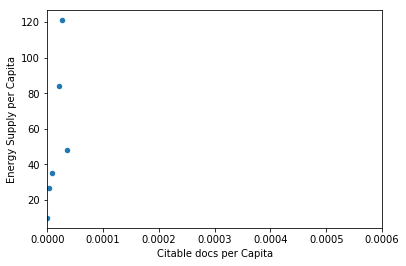

In [187]:
plot9()

In [194]:
median_value = Top15['% Renewable'].median()

In [196]:
#Top15['New'] == 1 
Top15[df['% Renewable'] > median_value, 'New'] == 1

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [199]:
df  = Top15

In [198]:
Top15['New'] = ( lambda x: if (Top15['% Renewable'] > median_value): 1   )

SyntaxError: invalid syntax (<ipython-input-198-2810f355feb4>, line 1)

In [200]:
df.loc[df['% Renewable'] > median_value,'New'] = 1

In [201]:
df['New'] = 0

In [204]:
df.loc[df['% Renewable'] >= median_value,'New'] = 1

In [203]:
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2009,2010,2011,2012,2013,2014,2015,PopEst,Citable docs per Capita,New
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,159.0,5.0,5.0,5.0,0.0,1.00,1.0,321000000.0,10.0,78.67,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,3.210000e+07,1.557632e-07,1
Albania,120.0,27.0,27.0,217.0,14.0,8.04,7.0,102000000.0,35.0,100.00,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,2.914286e+06,9.264706e-06,1
Algeria,40.0,1645.0,1626.0,11257.0,2286.0,6.84,46.0,NaN,51.0,0.55,...,1.372110e+11,1.612073e+11,2.000131e+11,2.090474e+11,2.097835e+11,2.139831e+11,1.647795e+11,NaN,NaN,0
American Samoa,190.0,1.0,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.64,...,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.390000e+08,6.380000e+08,6.410000e+08,NaN,NaN,0
Andorra,169.0,2.0,2.0,15.0,0.0,7.50,1.0,9000000.0,121.0,88.70,...,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,7.438017e+04,2.688889e-05,1
Angola,104.0,56.0,56.0,140.0,2.0,2.50,7.0,642000000.0,27.0,70.91,...,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,2.377778e+07,2.355140e-06,1
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0,136.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.470588e+04,NaN,0
Antigua and Barbuda,171.0,2.0,2.0,0.0,0.0,0.00,0.0,8000000.0,84.0,0.00,...,1.217720e+09,1.147942e+09,1.141865e+09,1.216046e+09,1.195885e+09,1.274330e+09,1.355646e+09,9.523810e+04,2.100000e-05,0
Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.795472e+12,2.109224e+12,2.501943e+12,2.740536e+12,2.838294e+12,2.904405e+12,2.561130e+12,NaN,NaN,0


In [205]:
def answer_ten():
    Top15 = answer_one()
    Top15['Renewable higher than Median Renewable'] = 0
    Top15.loc[Top15['% Renewable'] >= (Top15['% Renewable'].median()),'Renewable higher than Median Renewable'] = 1
    return "ANSWER"

In [207]:
    Top15 = answer_one()
    Top15['Renewable higher than Median Renewable'] = 0
    Top15.loc[Top15['% Renewable'] >= (Top15['% Renewable'].median()),'Renewable higher than Median Renewable'] = 1

In [225]:
Top15.sort_values(['Rank'],ascending=True,inplace=True)
#HighRenew = pd.Series(Top15.sort_values(['Rank'],ascending=True))

In [231]:
#HighRenew = pd.Series(Top15['Renewable higher than Median Renewable'])
HighRenew = pd.Series(Top15)

ValueError: cannot copy sequence with size 21 to array axis with dimension 15

In [593]:
def answer_ten():
    Top15 = answer_one()
    Top15['Renewable higher than Median Renewable'] = 0
    Top15.loc[Top15['% Renewable'] >= (Top15['% Renewable'].median()),'Renewable higher than Median Renewable'] = 1
    Top15.sort_values(['Rank'],ascending=True,inplace=True)
    HighRenew = pd.Series(Top15)
    return HighRenew

ValueError: cannot copy sequence with size 21 to array axis with dimension 15

In [269]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}


In [299]:
#continent_df = pd.DataFrame.from_dict(ContinentDict,orient='index')
#continent_df
#df = pd.DataFrame(ContinentDict.items(),columns=['Country','Continent'])
#df.set_index('Continent',inplace=True)
#df.groupby(ContinentDict,axis=0).apply(lambda x:x)
df = Top15.groupby(ContinentDict)

In [271]:
pd.DataFrame.from_dict?

In [239]:
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Renewable higher than Median Renewable
Country,,,,,,,,,,,,,,,,,,,,,
Australia,14.0,10616.0,10496.0,129788.0,22759.0,12.23,123.0,NaN,NaN,NaN,...,8.537646e+11,1.055335e+12,9.271683e+11,1.142877e+12,1.390557e+12,1.538194e+12,1.567179e+12,1.459598e+12,1.345383e+12,0
Austria,38.0,2133.0,2102.0,19946.0,2234.0,9.35,61.0,NaN,164.0,72.45,...,3.864590e+11,4.276115e+11,3.975943e+11,3.902119e+11,4.290374e+11,4.074516e+11,4.282484e+11,4.383762e+11,3.769674e+11,1
Algeria,40.0,1645.0,1626.0,11257.0,2286.0,6.84,46.0,NaN,51.0,0.55,...,1.349771e+11,1.710007e+11,1.372110e+11,1.612073e+11,2.000131e+11,2.090474e+11,2.097835e+11,2.139831e+11,1.647795e+11,0
Argentina,43.0,1389.0,1379.0,14060.0,2050.0,10.12,52.0,NaN,79.0,24.06,...,2.875305e+11,3.615580e+11,3.329765e+11,4.236274e+11,5.301633e+11,5.459824e+11,5.520251e+11,5.263197e+11,5.847115e+11,1
Armenia,88.0,105.0,105.0,648.0,250.0,6.17,13.0,143000000.0,48.0,28.24,...,9.206302e+09,1.166204e+10,8.647937e+09,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.052918e+10,1
Angola,104.0,56.0,56.0,140.0,2.0,2.50,7.0,642000000.0,27.0,70.91,...,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,1
Albania,120.0,27.0,27.0,217.0,14.0,8.04,7.0,102000000.0,35.0,100.00,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1
Afghanistan,159.0,5.0,5.0,5.0,0.0,1.00,1.0,321000000.0,10.0,78.67,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1
Andorra,169.0,2.0,2.0,15.0,0.0,7.50,1.0,9000000.0,121.0,88.70,...,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,1


In [255]:
#Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita
                                                 
Top15['PopEst_Str'] = Top15['PopEst'].map('{:,.2f}'.format)             
s = pd.Series(Top15['PopEst_Str'])


pandas.core.series.Series

In [241]:
s1 = pd.Series(Top15['PopEst'])

In [246]:
s1.to_string()


u'Country\nAustralia                       NaN\nAustria                         NaN\nAlgeria                         NaN\nArgentina                       NaN\nArmenia                2.979167e+06\nAngola                 2.377778e+07\nAlbania                2.914286e+06\nAfghanistan            3.210000e+07\nAndorra                7.438017e+04\nAntigua and Barbuda    9.523810e+04\nAmerican Samoa                  NaN\nAnguilla               1.470588e+04\nArab World                      NaN\nAruba                  1.000000e+05\nAustralia1                      NaN'

In [245]:
s1

Country
Australia                       NaN
Austria                         NaN
Algeria                         NaN
Argentina                       NaN
Armenia                2.979167e+06
Angola                 2.377778e+07
Albania                2.914286e+06
Afghanistan            3.210000e+07
Andorra                7.438017e+04
Antigua and Barbuda    9.523810e+04
American Samoa                  NaN
Anguilla               1.470588e+04
Arab World                      NaN
Aruba                  1.000000e+05
Australia1                      NaN
Name: PopEst, dtype: float64

In [256]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['PopEst_Str'] = Top15['PopEst'].map('{:,.2f}'.format)             
    PopEst = pd.Series(Top15['PopEst_Str'])
    return PopEst

In [257]:
answer_thirteen()

Country
Afghanistan            32,100,000.00
Albania                 2,914,285.71
Algeria                          nan
American Samoa                   nan
Andorra                    74,380.17
Angola                 23,777,777.78
Anguilla                   14,705.88
Antigua and Barbuda        95,238.10
Arab World                       nan
Argentina                        nan
Armenia                 2,979,166.67
Aruba                     100,000.00
Australia                        nan
Australia1                       nan
Austria                          nan
Name: PopEst_Str, dtype: object

In [258]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


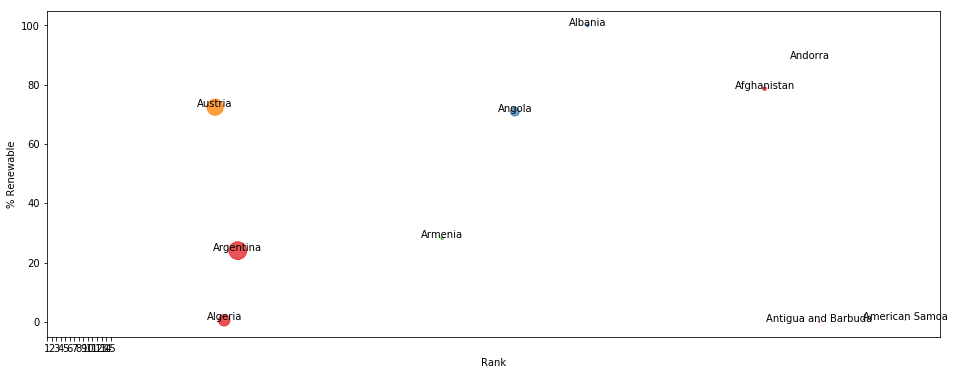

In [259]:
plot_optional()

In [300]:
(Top15['PopEst'])

Country
Australia                       NaN
Austria                         NaN
Algeria                         NaN
Argentina                       NaN
Armenia                2.979167e+06
Angola                 2.377778e+07
Albania                2.914286e+06
Afghanistan            3.210000e+07
Andorra                7.438017e+04
Antigua and Barbuda    9.523810e+04
American Samoa                  NaN
Anguilla               1.470588e+04
Arab World                      NaN
Aruba                  1.000000e+05
Australia1                      NaN
Name: PopEst, dtype: float64

In [301]:
Top15 = answer_one()
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,159.0,5.0,5.0,5.0,0.0,1.00,1.0,321000000.0,10.0,78.67,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10
Albania,120.0,27.0,27.0,217.0,14.0,8.04,7.0,102000000.0,35.0,100.00,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10
Algeria,40.0,1645.0,1626.0,11257.0,2286.0,6.84,46.0,NaN,51.0,0.55,1.170273e+11,1.349771e+11,1.710007e+11,1.372110e+11,1.612073e+11,2.000131e+11,2.090474e+11,2.097835e+11,2.139831e+11,1.647795e+11
American Samoa,190.0,1.0,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.64,4.960000e+08,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.390000e+08,6.380000e+08,6.410000e+08
Andorra,169.0,2.0,2.0,15.0,0.0,7.50,1.0,9000000.0,121.0,88.70,3.536633e+09,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN
Angola,104.0,56.0,56.0,140.0,2.0,2.50,7.0,642000000.0,27.0,70.91,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0,136.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,171.0,2.0,2.0,0.0,0.0,0.00,0.0,8000000.0,84.0,0.00,1.149025e+09,1.302389e+09,1.359734e+09,1.217720e+09,1.147942e+09,1.141865e+09,1.216046e+09,1.195885e+09,1.274330e+09,1.355646e+09
Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.404114e+12,1.637573e+12,2.077707e+12,1.795472e+12,2.109224e+12,2.501943e+12,2.740536e+12,2.838294e+12,2.904405e+12,2.561130e+12


In [317]:
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']

In [320]:
def answer_one():
        import pandas as pd
        import numpy as np
        energy = pd.read_csv('Energy Indicators.csv',skiprows=16,skipfooter=38,engine='python')
        energy.drop(energy.columns[[0,1]], axis=1,inplace=True)
        energy=energy.dropna(axis=1,how='all')

        for col in energy.columns:
            if col[:]=='Energy Supply per capita':
                energy.rename(columns={col:'Energy Supply per Capita'},inplace=True)
            if col[:]=='Renewable Electricity Production':
                energy.rename(columns={col:'% Renewable'},inplace=True)
            energy.rename(columns={ energy.columns[0]: "Country" },inplace=True)

        energy.dropna(subset=['Country'], how = 'all',inplace=True)

        #replace empty values with Nan
        energy[['Energy Supply','Energy Supply per Capita','% Renewable']] = energy[['Energy Supply','Energy Supply per Capita','% Renewable']].apply(pd.to_numeric,errors='coerce')      
        energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x:x*1000000)

        energy['Country'].replace(
            to_replace=['United States of America20','United States Virgin Islands','Bolivia (Plurinational State of)',
                   'China2','China, Hong Kong Special Administrative Region3','China, Macao Special Administrative Region4',
                   'Denmark5','France6','Greenland7','Indonesia8','Iran (Islamic Republic of)','Italy9',
                   'Japan10','Kuwait11','Micronesia (Federated States of)','Netherlands12','Portugal13','Saudi Arabia14',
                   'Serbia15','Ukraine18','Venezuela (Bolivarian Republic of)','United Kingdom of Great Britain and Northern Ireland19','Australia1'],
            value=['United States','United Virgin','Bolivia','China','Hong Kong','China, Macao Special Administrative Region',
              'Denmark','France','Greenland','Indonesia','Iran','Italy','Japan','Kuwait','Micronesia','Netherlands',
              'Portugal','Saudi Arabia','Serbia','Ukraine','Venezuela','United Kingdom','Australia'],
            inplace=True)


        GDP = pd.read_csv('world_bank.csv',skiprows=4)
        GDP['Country Name'].replace(
            to_replace=['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],
            value=['South Korea','Iran','Hong Kong'],
            inplace=True
        )
        GDP.dropna(axis=1,how='all',inplace=True)
        GDP.rename(columns={'Country Name': 'Country'}, inplace=True)

        ScimEn = pd.read_csv("scimagojr.csv")

        energy = energy.set_index('Country')
        GDP = GDP.set_index('Country')
        ScimEn = ScimEn.set_index('Country')

        df1 = energy.join(GDP, how='outer')
        final_merge = df1.join(ScimEn, how='outer')
        
        for i in range(1960,2005):
            final_merge.drop(str(i),axis=1,inplace=True)

        final_merge.head(15)

        cols = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
        final_merge = final_merge[cols]
        result_df = final_merge.head(15)

        return result_df

In [415]:
Top15 = answer_one()

In [416]:
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']

In [417]:
pop_df = Top15['PopEst']

In [418]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

In [432]:
#group_df = pd.DataFrame(pop_df.groupby(ContinentDict.values()).items())
pop_df.groupby(ContinentDict.values()).head()

#pop_df.groupby(ContinentDict)

Country
Afghanistan            3.210000e+07
Albania                2.914286e+06
Algeria                         NaN
American Samoa                  NaN
Andorra                7.438017e+04
Angola                 2.377778e+07
Anguilla               1.470588e+04
Antigua and Barbuda    9.523810e+04
Arab World                      NaN
Argentina                       NaN
Armenia                2.979167e+06
Aruba                  1.000000e+05
Australia                       NaN
Austria                         NaN
Name: PopEst, dtype: float64

In [ ]:
pop_df.groupby(ContinentDict.values()).apply

In [355]:
new_df = pd.DataFrame({'size' : df.size().values, 'sum' : df.sum().values, index = df.groups.keys())

SyntaxError: invalid syntax (<ipython-input-355-3efa3c94ff7b>, line 1)

In [358]:
new_pop_df = pd.DataFrame.from_dict?

In [408]:
new_pop_df = pd.DataFrame.from_dict

In [409]:
df = pd.DataFrame.from_dict(ContinentDict, orient='index')

,0
Canada,North America
Brazil,South America
Italy,Europe
France,Europe
United States,North America
Australia,Australia
Iran,Asia
India,Asia
United Kingdom,Europe
China,Asia


In [398]:
df 

,Continent
Canada,North America
Brazil,South America
Italy,Europe
France,Europe
United States,North America
Australia,Australia
Iran,Asia
India,Asia
United Kingdom,Europe
China,Asia


In [580]:
# dictionary to dataframe
pop_df = pd.DataFrame.from_dict(ContinentDict,orient='index')
#pop_df.reset_index()
pop_df.columns=['Continent'] 
pop_df
grouped = pop_df.groupby(['Continent'])
grouped

In [582]:
new_df = pop_df.join(Top15,how = 'outer')
new_df

,Continent,PopEst
Afghanistan,NaN,3.210000e+07
Albania,NaN,2.914286e+06
Algeria,NaN,NaN
American Samoa,NaN,NaN
Andorra,NaN,7.438017e+04
Angola,NaN,2.377778e+07
Anguilla,NaN,1.470588e+04
Antigua and Barbuda,NaN,9.523810e+04
Arab World,NaN,NaN
Argentina,NaN,NaN


In [588]:
#new_df.groupby(['Continent']).size().to_frame(name = 'size').reset_index()
new_df.groupby(['Continent']).size().to_frame(name = 'size').reset_index()

,Continent,size
0,Asia,5
1,Australia,1
2,Europe,6
3,North America,2
4,South America,1


In [590]:
new_df.groupby(['Continent'])['PopEst'].sum()

Continent
Asia            NaN
Australia       NaN
Europe          NaN
North America   NaN
South America   NaN
Name: PopEst, dtype: float64

In [574]:
#Top15 = Top15['PopEst'] 
#Top15
df = Top15.groupby(ContinentDict)

In [575]:
df

In [576]:
new_df = pd.DataFrame({'size' : df.size().values}, index = df.groups.keys())

In [577]:
new_df

,size
Australia,1


In [571]:
Top15.groupby(ContinentDict).Population.agg(['size', 'mean', 'std', 'sum'])

AttributeError: 'SeriesGroupBy' object has no attribute 'Population'

In [592]:
answer_ten()

ValueError: cannot copy sequence with size 21 to array axis with dimension 15